In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [110]:
dynamic_data=pd.read_csv("/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/data/dynamic.csv")


In [111]:
dynamic_data["id"].nunique()

20414

In [112]:
static_data=pd.read_csv("/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/data/static.csv")

In [113]:
static_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   20414 non-null  int64  
 1   hosp_admittime       20414 non-null  object 
 2   hosp_dischtime       20414 non-null  object 
 3   icu_intime           20414 non-null  object 
 4   icu_outtime          20414 non-null  object 
 5   los_icu              20414 non-null  float64
 6   icu_death            20414 non-null  int64  
 7   gender               20414 non-null  object 
 8   race                 20414 non-null  object 
 9   admission_age        20414 non-null  float64
 10  weight_admit         19802 non-null  float64
 11  height               11000 non-null  float64
 12  admission_type       20414 non-null  object 
 13  first_careunit       20414 non-null  object 
 14  charlson_score       20414 non-null  int64  
 15  atrial_fibrillation  20414 non-null 

Index(['icu_death', 'atrial_fibrillation', 'malignant_cancer', 'chf', 'ckd',
       'cld', 'copd', 'diabetes', 'hypertension', 'ihd', 'stroke'],
      dtype='object')


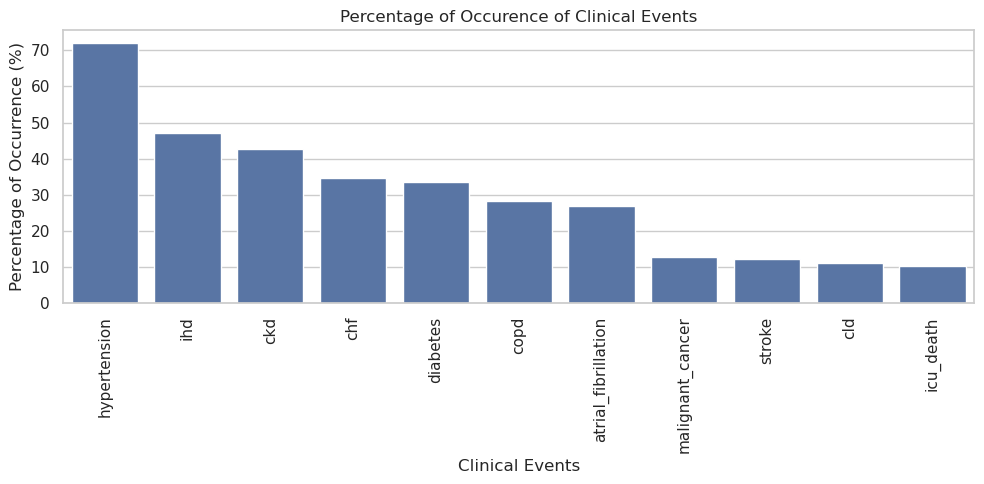

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

binary_columns = static_data.select_dtypes(include=['int', 'int64']).columns
binary_columns=binary_columns.drop(["id","charlson_score"])
print(binary_columns)

percentage_occurrence = ((static_data[binary_columns] == 1).mean() * 100).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=percentage_occurrence.index, y=percentage_occurrence.values)
plt.title('Percentage of Occurence of Clinical Events')
plt.xlabel('Clinical Events')
plt.ylabel('Percentage of Occurrence (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels

plt.savefig('/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/dataset_basic1.png')

plt.show()

/tmp/ipykernel_16309/2777756827.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=static_data['admission_age'], ax=axes[0], scale='width', color='lightblue')
/tmp/ipykernel_16309/2777756827.py:17: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=static_data['charlson_score'], ax=axes[1], scale='width', color='lightblue')


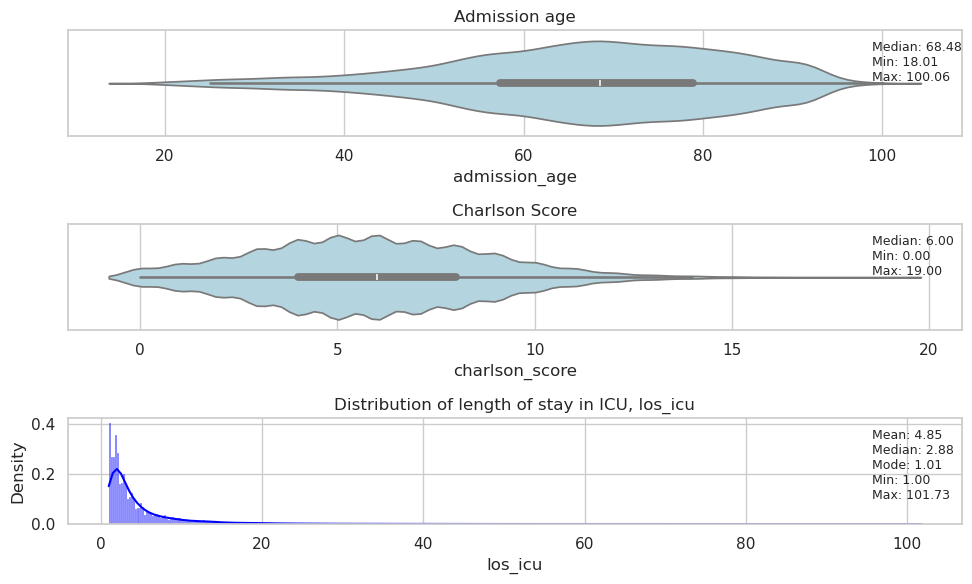

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 6))

# Create boxplots for age, los_icu, and charlson_score
sns.violinplot(x=static_data['admission_age'], ax=axes[0], scale='width', color='lightblue')
axes[0].set_title('Admission age')
min_age = static_data['admission_age'].min()
max_age = static_data['admission_age'].max()
median_age = static_data['admission_age'].median()
axes[0].text(0.9, 0.9, f'Median: {median_age:.2f}\nMin: {min_age:.2f}\nMax: {max_age:.2f}', 
             transform=axes[0].transAxes, fontsize=9, verticalalignment='top')


# Plotting 'charlson_score'
sns.violinplot(x=static_data['charlson_score'], ax=axes[1], scale='width', color='lightblue')
axes[1].set_title('Charlson Score')
min_cscore = static_data['charlson_score'].min()
max_cscore = static_data['charlson_score'].max()
median_cscore = static_data['charlson_score'].median()

axes[1].text(0.9, 0.9, f'Median: {median_cscore:.2f}\nMin: {min_cscore:.2f}\nMax: {max_cscore:.2f}', 
             transform=axes[1].transAxes, fontsize=9, verticalalignment='top')

## los_icu
sns.histplot(static_data['los_icu'], kde=True, ax=axes[2], color='blue', stat='density')
axes[2].set_title('Distribution of length of stay in ICU, los_icu')
min_los = static_data['los_icu'].min()
max_los = static_data['los_icu'].max()
mean_los = static_data['los_icu'].mean()
median_los = static_data['los_icu'].median()
mode_los = static_data['los_icu'].mode()[0]

axes[2].text(0.9, 0.9, f'Mean: {mean_los:.2f}\nMedian: {median_los:.2f}\nMode: {mode_los:.2f}\nMin: {min_los:.2f}\nMax: {max_los:.2f}', 
             transform=axes[2].transAxes, fontsize=9, verticalalignment='top')


# Adjusting layout
plt.tight_layout()
plt.savefig('/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/dataset_basic2.png')
# Show the plot
plt.show()


In [116]:
static_data.columns

Index(['id', 'hosp_admittime', 'hosp_dischtime', 'icu_intime', 'icu_outtime',
       'los_icu', 'icu_death', 'gender', 'race', 'admission_age',
       'weight_admit', 'height', 'admission_type', 'first_careunit',
       'charlson_score', 'atrial_fibrillation', 'malignant_cancer', 'chf',
       'ckd', 'cld', 'copd', 'diabetes', 'hypertension', 'ihd', 'stroke'],
      dtype='object')

In [126]:
static_reduced=static_data.copy(deep=True)
static_reduced.drop(columns=["id","hosp_admittime","hosp_dischtime","icu_intime", "icu_outtime","gender","race","admission_type","first_careunit"],inplace=True)

In [127]:
static_reduced

,los_icu,icu_death,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke
0,2.15,0,58.441631,92.0,170.0,11,0,0,0,0,0,1,1,1,0,0
1,4.90,0,79.748598,55.0,NaN,5,0,0,0,0,0,1,0,1,1,0
2,1.46,0,81.717397,59.0,NaN,8,0,0,1,1,0,0,0,0,1,0
3,1.79,0,63.769278,73.6,160.0,8,0,0,1,1,0,1,1,1,1,0
4,2.97,0,84.191979,79.1,160.0,6,1,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20409,6.38,0,73.695489,122.2,170.0,8,1,0,1,1,0,0,0,1,1,0
20410,1.75,0,86.663745,69.3,NaN,7,0,0,1,1,0,0,0,1,0,0
20411,4.14,1,43.127963,67.0,152.0,3,0,0,1,0,0,0,0,0,0,0
20412,10.93,0,57.354082,101.8,168.0,1,0,0,0,1,0,0,0,1,0,0


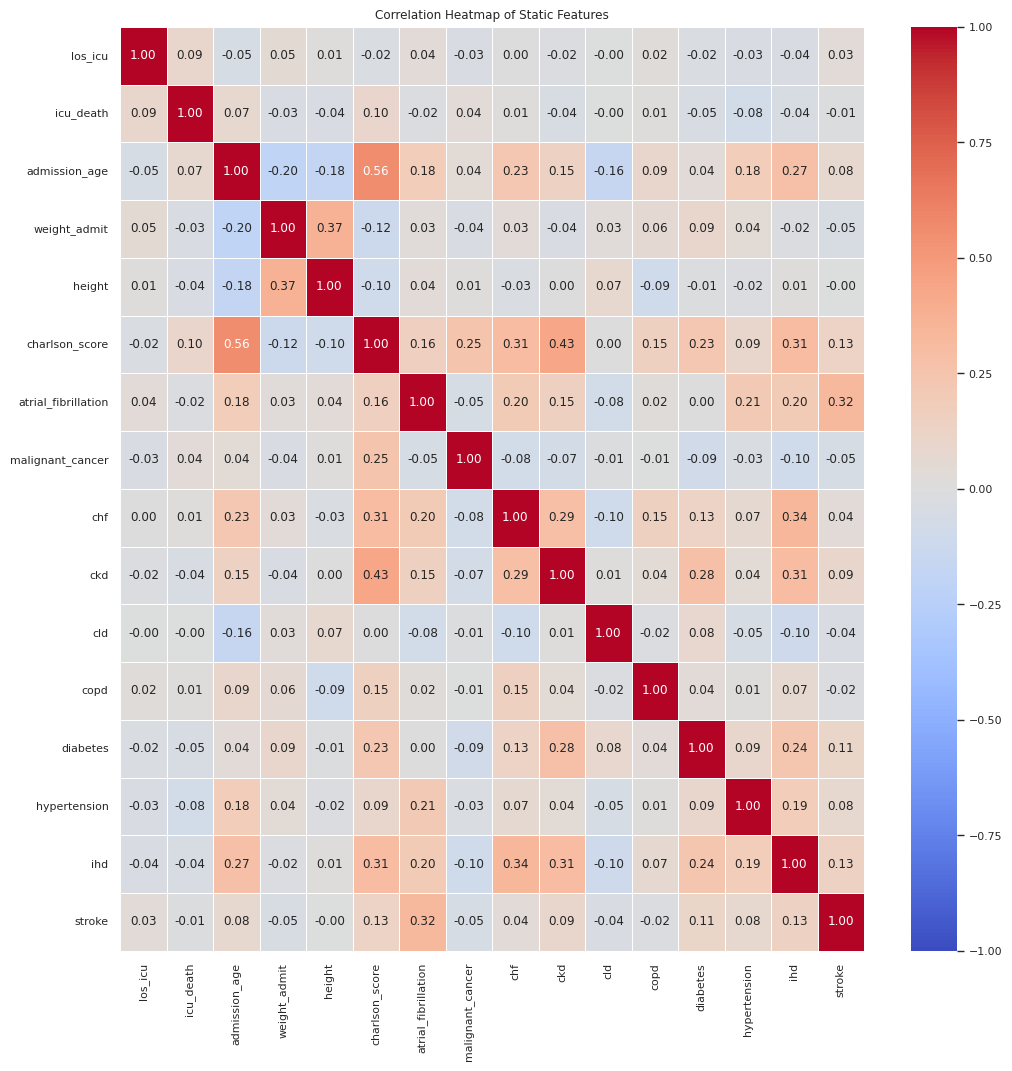

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper", font_scale=0.9)
correlation_matrix = static_reduced.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1,fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Static Features')


plt.savefig('/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/static_corr.png')
plt.show()

In [196]:
merged_data=pd.read_csv("/home/ab1/Desktop/SPH6004/Assignment2/median_icumean_combined.csv")
merged_data.columns

Index(['id', 'hosp_admittime', 'hosp_dischtime', 'icu_intime', 'icu_outtime',
       'los_icu', 'icu_death', 'gender', 'admission_age', 'weight_admit',
       'height', 'charlson_score', 'atrial_fibrillation', 'malignant_cancer',
       'chf', 'ckd', 'cld', 'copd', 'diabetes', 'hypertension', 'ihd',
       'stroke', 'icu_outcome', 'race_encode_African', 'race_encode_Asian',
       'race_encode_Caucasian', 'race_encode_Hispanic',
       'race_encode_Not Specified', 'race_encode_South American',
       'admission_type_DIRECT EMER.', 'admission_type_DIRECT OBSERVATION',
       'admission_type_ELECTIVE', 'admission_type_EU OBSERVATION',
       'admission_type_EW EMER.', 'admission_type_OBSERVATION ADMIT',
       'admission_type_SURGICAL SAME DAY ADMISSION', 'admission_type_URGENT',
       'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)',
       'first_careunit_Coronary Care Unit (CCU)',
       'first_careunit_Medical Intensive Care Unit (MICU)',
       'first_careunit_Medical/

In [197]:
merged_data.drop(columns=["id","hosp_admittime","hosp_dischtime","icu_intime","icu_outtime","icu_outcome",
                         'race_encode_African', 'race_encode_Asian',
       'race_encode_Caucasian', 'race_encode_Hispanic',
       'race_encode_Not Specified', 'race_encode_South American',
       'admission_type_DIRECT EMER.', 'admission_type_DIRECT OBSERVATION',
       'admission_type_ELECTIVE', 'admission_type_EU OBSERVATION',
       'admission_type_EW EMER.', 'admission_type_OBSERVATION ADMIT',
       'admission_type_SURGICAL SAME DAY ADMISSION', 'admission_type_URGENT',
       'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)',
       'first_careunit_Coronary Care Unit (CCU)',
       'first_careunit_Medical Intensive Care Unit (MICU)',
       'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)',
       'first_careunit_Neuro Intermediate', 'first_careunit_Neuro Stepdown',
       'first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU)',
       'first_careunit_Surgical Intensive Care Unit (SICU)',
       'first_careunit_Trauma SICU (TSICU)'],inplace=True)

In [198]:
merged_data.columns

Index(['los_icu', 'icu_death', 'gender', 'admission_age', 'weight_admit',
       'height', 'charlson_score', 'atrial_fibrillation', 'malignant_cancer',
       'chf', 'ckd', 'cld', 'copd', 'diabetes', 'hypertension', 'ihd',
       'stroke', 'aniongap', 'bicarbonate', 'bun', 'calcium', 'chloride',
       'creatinine', 'glucose', 'sodium', 'potassium', 'hematocrit',
       'hemoglobin', 'mch', 'mchc', 'mcv', 'platelet', 'rbc', 'rdw', 'wbc',
       'inr', 'pt', 'ptt'],
      dtype='object')

In [ ]:
merged_data

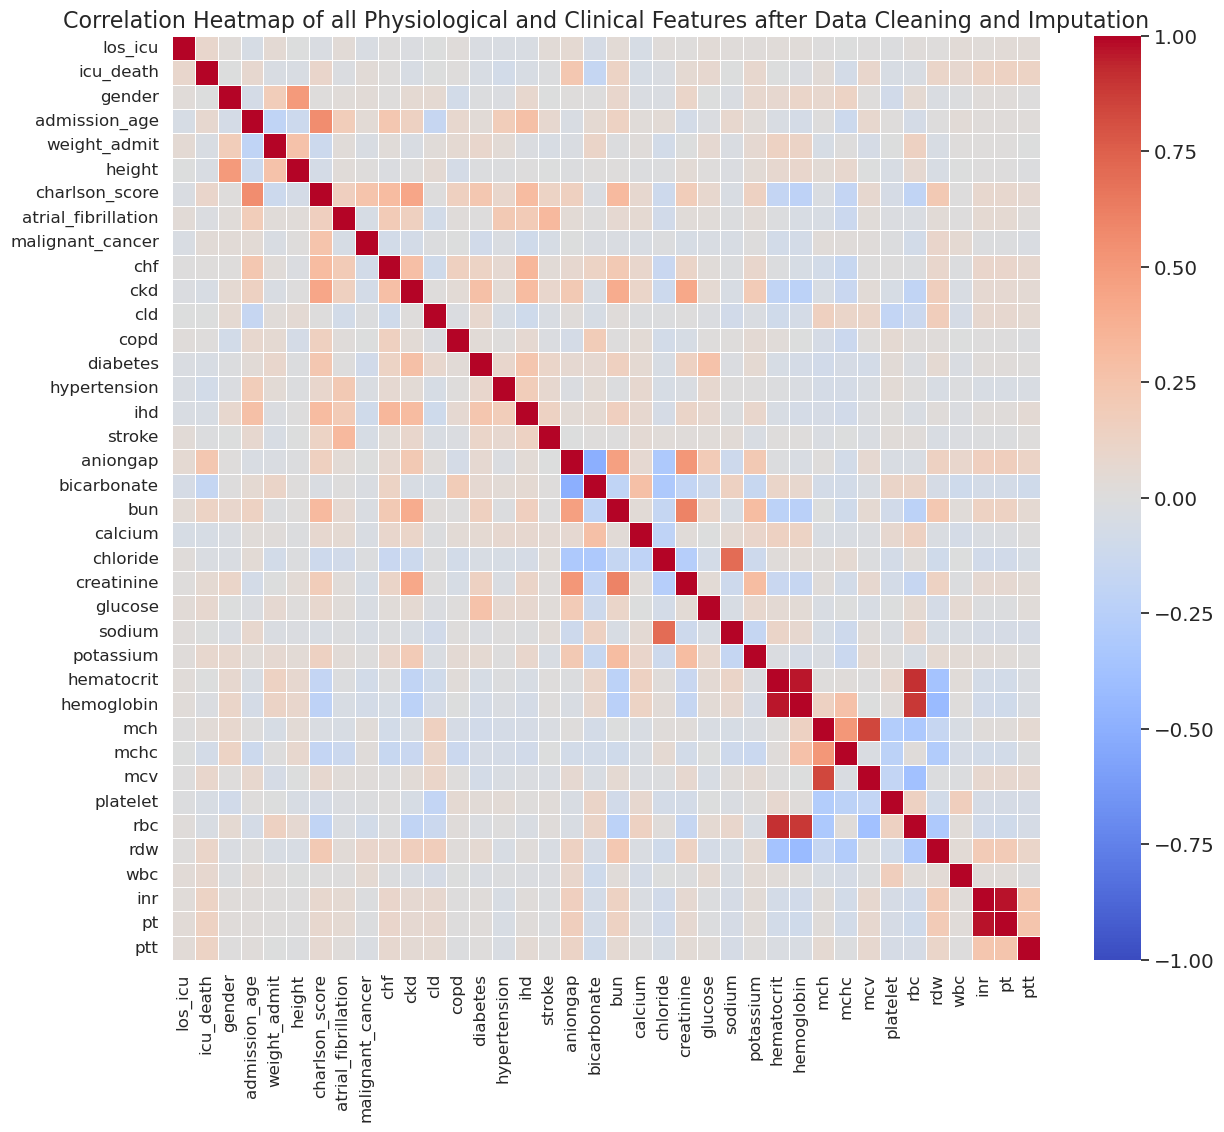

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = merged_data.corr()

plt.figure(figsize=(14, 12))
ax=sns.heatmap(correlation_matrix, cmap='coolwarm',vmin=-1, vmax=1, linewidths=.5)
ax.tick_params(labelsize=12)

plt.title('Correlation Heatmap of all Physiological and Clinical Features after Data Cleaning and Imputation',fontdict={'fontsize':16})
plt.savefig('/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/features_cleaned_imputed.png',bbox_inches = 'tight')


In [174]:
correlation_matrix

,los_icu,icu_death,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
los_icu,1.000000,0.089271,0.030277,-0.050503,0.052649,-0.001438,-0.023650,0.037534,-0.032959,0.003620,...,0.003492,-0.004739,0.007759,-0.010440,0.021825,0.009817,0.038110,0.030438,0.031667,0.039003
icu_death,0.089271,1.000000,-0.007088,0.070777,-0.032218,-0.034320,0.099107,-0.020986,0.038096,0.011123,...,0.036153,-0.071299,0.086642,-0.043209,-0.034916,0.109112,0.077417,0.129389,0.134728,0.127490
gender,0.030277,-0.007088,1.000000,-0.069909,0.187088,0.494640,0.008297,0.026109,0.037027,0.013555,...,0.080301,0.126537,0.012251,-0.091284,0.060152,-0.024691,-0.014835,0.019997,0.020152,0.006294
admission_age,-0.050503,0.070777,-0.069909,1.000000,-0.198095,-0.124737,0.555801,0.180386,0.044645,0.226575,...,0.006103,-0.120374,0.084988,0.009856,-0.069935,0.000022,0.034951,0.019452,0.021318,0.019291
weight_admit,0.052649,-0.032218,0.187088,-0.198095,1.000000,0.258389,-0.123135,0.028134,-0.035872,0.030151,...,-0.049001,0.000877,-0.059685,-0.007640,0.146215,-0.042655,0.015196,0.015435,0.013649,-0.005582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rdw,0.009817,0.109112,-0.024691,0.000022,-0.042655,-0.040349,0.218562,0.035714,0.097073,0.093697,...,-0.159310,-0.285839,-0.010455,-0.082188,-0.310301,1.000000,0.040471,0.195967,0.200042,0.107986
wbc,0.038110,0.077417,-0.014835,0.034951,0.015196,-0.003578,0.006396,0.005795,0.061939,-0.013653,...,-0.046306,-0.058651,-0.013193,0.166197,0.027871,0.040471,1.000000,0.030306,0.029796,0.005209
inr,0.030438,0.129389,0.019997,0.019452,0.015435,0.002554,0.078665,0.054964,-0.010182,0.099093,...,0.017691,-0.082574,0.072646,-0.058889,-0.091316,0.195967,0.030306,1.000000,0.976281,0.239225
pt,0.031667,0.134728,0.020152,0.021318,0.013649,0.002436,0.080077,0.062207,-0.007916,0.096718,...,0.018014,-0.080362,0.072075,-0.061956,-0.094307,0.200042,0.029796,0.976281,1.000000,0.244184


In [80]:
static_data


,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,race,admission_age,...,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke
0,24099382,6/11/11 7:15,6/18/11 21:45,6/11/11 14:31,6/13/11 18:05,2.15,0,M,OTHER,58.441631,...,0,0,0,0,0,1,1,1,0,0
1,27824879,9/30/28 20:55,10/10/28 15:54,9/30/28 20:58,10/5/28 18:39,4.90,0,F,WHITE,79.748598,...,0,0,0,0,0,1,0,1,1,0
2,27146619,9/20/41 0:34,9/22/41 12:05,9/20/41 7:13,9/21/41 18:10,1.46,0,F,WHITE,81.717397,...,0,0,1,1,0,0,0,0,1,0
3,22476441,10/8/73 16:46,10/16/73 13:05,10/8/73 18:28,10/10/73 13:26,1.79,0,F,BLACK/AFRICAN AMERICAN,63.769278,...,0,0,1,1,0,1,1,1,1,0
4,23169158,3/12/27 1:19,3/19/27 13:15,3/12/27 2:43,3/15/27 1:53,2.97,0,F,WHITE,84.191979,...,1,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20409,29968077,9/12/59 6:20,10/5/59 15:41,9/12/59 7:45,9/18/59 16:55,6.38,0,M,WHITE,73.695489,...,1,0,1,1,0,0,0,1,1,0
20410,29975784,8/30/36 15:18,9/2/36 16:15,8/30/36 16:48,9/1/36 10:41,1.75,0,M,WHITE,86.663745,...,0,0,1,1,0,0,0,1,0,0
20411,29987115,2/16/48 17:42,2/20/48 19:00,2/16/48 17:43,2/20/48 21:00,4.14,1,F,UNKNOWN,43.127963,...,0,0,1,0,0,0,0,0,0,0
20412,29990494,5/10/71 12:05,6/16/71 13:45,5/17/71 22:16,5/28/71 20:41,10.93,0,M,WHITE - BRAZILIAN,57.354082,...,0,0,0,1,0,0,0,1,0,0


In [6]:
dynamic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93604 entries, 0 to 93603
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93604 non-null  int64  
 1   charttime           93604 non-null  object 
 2   albumin             18650 non-null  float64
 3   globulin            519 non-null    float64
 4   total_protein       975 non-null    float64
 5   aniongap            87378 non-null  float64
 6   bicarbonate         87743 non-null  float64
 7   bun                 88397 non-null  float64
 8   calcium             78419 non-null  float64
 9   chloride            90093 non-null  float64
 10  creatinine          88774 non-null  float64
 11  glucose             85696 non-null  float64
 12  sodium              89998 non-null  float64
 13  potassium           91066 non-null  float64
 14  heart_rate          4259 non-null   float64
 15  sbp                 3381 non-null   float64
 16  dbp 

In [ ]:
dynamic_data['id'] = dynamic_data['id'].astype(str)
num_cols = dynamic_data.columns[dynamic_data.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

#handle duplicates in dynamic_data using median
dynamic_data.groupby(['id', 'charttime']).median().reset_index()
#static_data=pd.read_csv("/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/data/static.csv")
notes=pd.read_csv("/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/data/notes.csv")

In [3]:
num_cols

Index(['albumin', 'globulin', 'total_protein', 'aniongap', 'bicarbonate',
       'bun', 'calcium', 'chloride', 'creatinine', 'glucose', 'sodium',
       'potassium', 'heart_rate', 'sbp', 'dbp', 'mbp', 'resp_rate',
       'temperature', 'spo2', 'hematocrit', 'hemoglobin', 'mch', 'mchc', 'mcv',
       'platelet', 'rbc', 'rdw', 'wbc', 'alt', 'ast', 'alp', 'amylase',
       'bilirubin_total', 'bilirubin_direct', 'bilirubin_indirect', 'ck_cpk',
       'ck_mb', 'ggt', 'ld_ldh', 'so2', 'po2', 'pco2', 'fio2_chartevents',
       'aado2', 'aado2_calc', 'pao2fio2ratio', 'ph', 'baseexcess',
       'bicarbonate_bg', 'totalco2', 'hematocrit_bg', 'hemoglobin_bg',
       'carboxyhemoglobin', 'methemoglobin', 'chloride_bg', 'calcium_bg',
       'temperature_bg', 'potassium_bg', 'sodium_bg', 'lactate_bg',
       'glucose_bg', 'd_dimer', 'fibrinogen', 'thrombin', 'inr', 'pt', 'ptt',
       'urineoutput'],
      dtype='object')

In [7]:
#static data will be based on QF version
static_train=pd.read_excel("/home/ab1/Desktop/SPH6004/static_train_df.xlsx")
static_train['id'] = static_train['id'].astype(str)
static_test=pd.read_excel("/home/ab1/Desktop/SPH6004/static_test_df.xlsx")
static_test['id'] = static_test['id'].astype(str)
static_holdout=pd.read_excel("/home/ab1/Desktop/SPH6004/static_holdout_df.xlsx")
static_holdout['id'] = static_holdout['id'].astype(str)

In [5]:
static_holdout

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,race,admission_age,...,admission_type_URGENT,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Neuro Intermediate,first_careunit_Neuro Stepdown,first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU)
0,22476441,10/8/73 16:46,10/16/73 13:05,10/8/73 18:28,10/10/73 13:26,1.79,0,0,BLACK/AFRICAN AMERICAN,63.769278,...,0,0,0,0,1,0,0,0,0,0
1,29600294,8/14/48 22:57,8/18/48 21:12,8/16/48 8:57,8/17/48 14:45,1.24,0,1,WHITE,62.620061,...,0,0,0,0,1,0,0,0,0,0
2,23559586,8/4/37 0:07,9/2/37 17:05,8/10/37 19:54,8/13/37 17:54,2.92,0,0,BLACK/AFRICAN AMERICAN,75.589414,...,1,0,0,0,1,0,0,0,0,0
3,24349193,7/3/85 20:20,8/3/85 14:42,7/3/85 22:45,7/12/85 13:40,8.62,0,0,WHITE,53.505433,...,0,0,0,1,0,0,0,0,0,0
4,23621452,5/27/59 7:50,5/31/59 11:30,5/27/59 9:06,5/28/59 15:07,1.25,0,0,WHITE,59.399479,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,29902791,11/25/26 17:59,12/14/26 15:15,11/27/26 1:33,11/28/26 15:18,1.57,0,1,WHITE,69.901499,...,0,0,0,0,0,0,0,0,1,0
2038,29906773,3/18/91 21:05,3/25/91 16:03,3/18/91 22:05,3/24/91 0:37,5.11,0,1,WHITE,68.210486,...,0,0,0,1,0,0,0,0,0,0
2039,29916417,9/6/29 19:47,9/17/29 16:30,9/6/29 20:50,9/9/29 22:21,3.06,0,0,WHITE,68.681259,...,0,0,0,1,0,0,0,0,0,0
2040,29961119,7/6/75 23:40,7/15/75 18:34,7/13/75 12:51,7/15/75 20:57,2.34,1,1,OTHER,91.511951,...,0,0,0,1,0,0,0,0,0,0


In [6]:
static_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14289 entries, 0 to 14288
Data columns (total 47 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   id                                                               14289 non-null  object 
 1   hosp_admittime                                                   14289 non-null  object 
 2   hosp_dischtime                                                   14289 non-null  object 
 3   icu_intime                                                       14289 non-null  object 
 4   icu_outtime                                                      14289 non-null  object 
 5   los_icu                                                          14289 non-null  float64
 6   icu_death                                                        14289 non-null  int64  
 7   gender                                  

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
#imputed_dynamic_train = imputer.fit_transform(dynamic_train.drop(columns=['id', 'charttime']))
#imputed_dynamic_train = pd.DataFrame(imputed_dynamic_train,columns=dynamic_train.drop(columns=['id', 'charttime']).columns)
static_train_weight_height= static_train.get(["weight_admit","height"])
static_test_weight_height= static_test.get(["weight_admit","height"])
static_holdout_weight_height= static_holdout.get(["weight_admit","height"])

static_train_imputed_median = imputer.fit_transform(static_train_weight_height)
static_test_imputed_median = imputer.transform(static_test_weight_height)
static_holdout_imputed_median = imputer.transform(static_holdout_weight_height)

imputed_dynamic_train = pd.DataFrame(static_train_imputed_median,columns=["weight_admit","height"])
imputed_dynamic_test = pd.DataFrame(static_test_imputed_median,columns=["weight_admit","height"])
imputed_dynamic_holdout = pd.DataFrame(static_holdout_imputed_median,columns=["weight_admit","height"])
static_train["weight_admit"]=imputed_dynamic_train["weight_admit"]
static_train["height"]=imputed_dynamic_train["height"]

static_test["weight_admit"]=imputed_dynamic_test["weight_admit"]
static_test["height"]=imputed_dynamic_test["height"]

static_holdout["weight_admit"]=imputed_dynamic_holdout["weight_admit"]
static_holdout["height"]=imputed_dynamic_holdout["height"]


In [8]:
static_train["id"].nunique()

14289

In [9]:
# import datetime
# dynamic_data['charttime']=pd.to_datetime(dynamic_data['charttime'], format= '%m/%d/%y %H:%M')
# static_data['hosp_admittime']=pd.to_datetime(static_data['hosp_admittime'], format= '%m/%d/%y %H:%M')
# static_data['hosp_dischtime']=pd.to_datetime(static_data['hosp_dischtime'], format= '%m/%d/%y %H:%M')
# static_data['icu_intime']=pd.to_datetime(static_data['icu_intime'], format= '%m/%d/%y %H:%M')
# static_data['icu_outtime']=pd.to_datetime(static_data['icu_outtime'], format= '%m/%d/%y %H:%M')

In [10]:
#Split dynamic data based on QF's splitting
dynamic_train=dynamic_data[dynamic_data["id"].isin(static_train["id"])]
dynamic_test=dynamic_data[dynamic_data["id"].isin(static_test["id"])]
dynamic_holdout=dynamic_data[dynamic_data["id"].isin(static_holdout["id"])]
#dynamic_train['id'].nunique()

In [11]:
dynamic_train["id"].nunique()

14289

                   NA Percentage
bicarbonate_bg            100.00
carboxyhemoglobin         100.00
methemoglobin             100.00
aado2                      99.99
chloride_bg                99.98
...                          ...
sodium                      3.79
chloride                    3.73
potassium                   2.69
charttime                   0.00
id                          0.00

[70 rows x 1 columns]


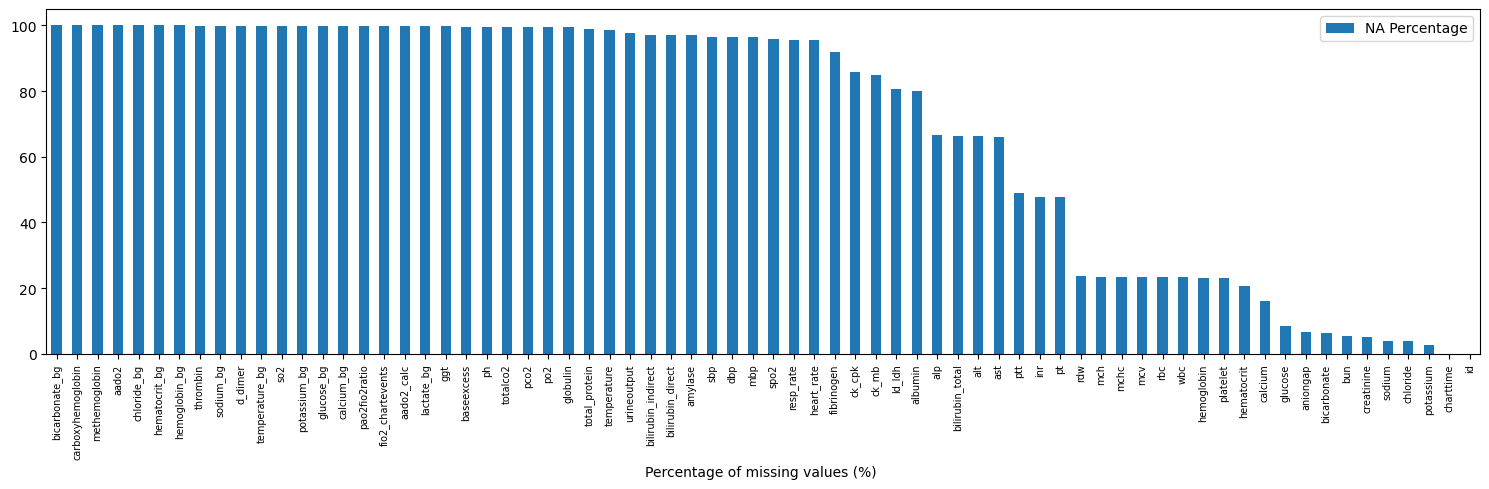

In [12]:
data_perc = dynamic_train.isna().mean().round(4) * 100
data_perc= data_perc.sort_values(ascending=False)
data_perc = pd.DataFrame({'NA Percentage' :data_perc})
print(data_perc)

plt.rcParams['figure.figsize'] = (15,5)

data_perc.plot(kind="bar")
plt.xticks(fontsize=7)

plt.xlabel('Percentage of missing values (%) ')
plt.tight_layout()
plt.savefig('/home/ab1/Desktop/SPH6004/assignment2_dynamicdatatrain_NA_perc.jpg')
plt.show()


In [13]:
#remove column if more than 50% missing data
dynamic_train.dropna(axis=1,thresh=0.5*len(dynamic_train),inplace=True)
columns_to_keep=dynamic_train.columns
num_cols = dynamic_train.columns[dynamic_train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# dynamic_train=dynamic_train[columns_to_keep]
dynamic_test=dynamic_test[columns_to_keep]
dynamic_holdout=dynamic_holdout[columns_to_keep]

/tmp/ipykernel_26754/1260385768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_train.dropna(axis=1,thresh=0.5*len(dynamic_train),inplace=True)


In [14]:
dynamic_train["id"].nunique()

14289

In [15]:
dynamic_train.columns

Index(['id', 'charttime', 'aniongap', 'bicarbonate', 'bun', 'calcium',
       'chloride', 'creatinine', 'glucose', 'sodium', 'potassium',
       'hematocrit', 'hemoglobin', 'mch', 'mchc', 'mcv', 'platelet', 'rbc',
       'rdw', 'wbc', 'inr', 'pt', 'ptt'],
      dtype='object')

In [16]:
columns_to_keep

Index(['id', 'charttime', 'aniongap', 'bicarbonate', 'bun', 'calcium',
       'chloride', 'creatinine', 'glucose', 'sodium', 'potassium',
       'hematocrit', 'hemoglobin', 'mch', 'mchc', 'mcv', 'platelet', 'rbc',
       'rdw', 'wbc', 'inr', 'pt', 'ptt'],
      dtype='object')

In [17]:
data_perc = dynamic_train.isna().mean().round(4) * 100
data_perc= data_perc.sort_values(ascending=False)
data_perc = pd.DataFrame({'NA Percentage' :data_perc})
print(data_perc)

             NA Percentage
ptt                  49.03
inr                  47.82
pt                   47.80
rdw                  23.57
mch                  23.51
mcv                  23.49
mchc                 23.49
rbc                  23.48
wbc                  23.47
hemoglobin           23.18
platelet             23.17
hematocrit           20.60
calcium              16.16
glucose               8.33
aniongap              6.62
bicarbonate           6.26
bun                   5.53
creatinine            5.15
sodium                3.79
chloride              3.73
potassium             2.69
charttime             0.00
id                    0.00


In [18]:
dynamic_train["aniongap"]

0        16.0
1        15.0
2        12.0
3        12.0
4         NaN
         ... 
93597     9.0
93598    14.0
93599    15.0
93602    22.0
93603    18.0
Name: aniongap, Length: 64985, dtype: float64

In [19]:
num_cols=['aniongap', 'bicarbonate', 'bun', 'calcium', 'chloride', 'creatinine',
       'glucose', 'sodium', 'potassium', 'hematocrit', 'hemoglobin', 'mch',
       'mchc', 'mcv', 'platelet', 'rbc', 'rdw', 'wbc', 'inr', 'pt', 'ptt']

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
imputer.fit(dynamic_train[num_cols])
dynamic_train[num_cols] = imputer.transform(dynamic_train[num_cols])
dynamic_test[num_cols] = imputer.transform(dynamic_test[num_cols])
dynamic_holdout[num_cols] = imputer.transform(dynamic_holdout[num_cols])
#imputed_dynamic_train = pd.DataFrame(imputed_dynamic_train,columns=dynamic_train.drop(columns=['id', 'charttime']).columns)



/home/ab1/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/tmp/ipykernel_26754/630464890.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_train[num_cols] = imputer.transform(dynamic_train[num_cols])


In [21]:
notes.shape ##to think of how to incoporate

(81206, 6)

In [22]:
# static_train.first_careunit.unique()
# #One-Hot Encoding for gender and first_careunit

In [23]:
static_train["los_icu"].describe()

count    14289.000000
mean         4.861710
std          6.045013
min          1.000000
25%          1.800000
50%          2.880000
75%          5.260000
max        101.730000
Name: los_icu, dtype: float64

In [24]:
# from sklearn.preprocessing import OrdinalEncoder
# # classify LOS into different classes . 2 days: short. 3 to 7 days : medium. more than 7 days:long
# def classify_length_of_stay(days):
#     if days <= 2:
#         return "short"
#     elif 3 <= days <= 7:
#         return "medium"
#     else:
#         return "long"

# # Bin the length of stay

# static_train['LOS_Category'] = static_train['los_icu'].apply(classify_length_of_stay)
# static_test['LOS_Category'] = static_test['los_icu'].apply(classify_length_of_stay)
# static_holdout['LOS_Category'] = static_holdout['los_icu'].apply(classify_length_of_stay)
# stay_order = ['short', 'medium', 'long']
# # Initialize OrdinalEncoder with the specified categories order
# encoder = OrdinalEncoder(categories=[stay_order])
# static_train['LOS_encoded'] = encoder.fit_transform(static_train[['LOS_Category']])
# static_test['LOS_encoded'] = encoder.transform(static_test[['LOS_Category']])
# static_holdout['LOS_encoded'] = encoder.transform(static_holdout[['LOS_Category']])

In [25]:
#merge static and dynamic into one dataframe
# train_data=dynamic_train.merge(static_train, how='left', on='id')
# test_data=dynamic_test.merge(static_test, how='left', on='id')
# holdout_data=dynamic_holdout.merge(static_holdout, how='left', on='id')



In [26]:
dynamic_train.to_csv('/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/dynamic_train_data_MICE.csv', index=False)
dynamic_test.to_csv('/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/dynamic_test_data_MICE.csv', index=False)
dynamic_holdout.to_csv('/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/dynamic_holdout_data_MICE.csv', index=False)

In [27]:
# def extract_date(X):
#     return pd.to_datetime(X).dt.date.reshape(-1, 1)

# static_columns_keep=[]

# static_preprocess = Pipeline([
#     ('selector', ColumnTransformer([('selector','passthrough', columns_keep)],remainder="drop")),
#     ("date_transform" ColumnTransformer([('date_transform', FunctionTransformer(extract_date, validate=False), ['datetime_column'])], remainder='passthrough')),
#     ('encodes_type', ColumnTransformer([('ordinal_encode',OrdinalEncoder(categories=[order]), [0])],remainder="passthrough")),
#     ('add_one', ColumnTransformer([('add_one', FunctionTransformer(add_one, validate=False), [0])], remainder='passthrough')) 
# ])


In [28]:
# static_train.to_csv('/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/static_train_data_median.csv', index=False)
# static_test.to_csv('/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/static_test_data_median.csv', index=False)
# static_holdout.to_csv('/home/ab1/Desktop/SPH6004/Assignment2/assignment2_data/static_holdout_data_median.csv', index=False)